In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [9]:
import glob
allFiles = glob.glob("1801-*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame.drop('Unnamed: 0', axis = 1, inplace = True)
frame.reset_index(drop = True, inplace = True)
frame.tail()

,title,abstracts,authors_n,authors_a,subject
3938,Title:\nMicroscopic Piezoelectric Theory and E...,The lack of inversion symmetry in semiconduct...,"['Yunhua Wang', 'Zongtan Wang', 'Jie Li', 'Jie...","['/find/cond-mat/1/au:+Wang_Y/0/1/0/all/0/1', ...",Condensed Matter > Mesoscale and Nanoscale Phy...
3939,Title:\nNon-Hermitian gauged topological laser...,Stable and phase-locked emission in an extend...,['Stefano Longhi'],['/find/physics/1/au:+Longhi_S/0/1/0/all/0/1'],Physics > Optics
3940,Title:\nExpectations of the Cosmic Antideutero...,The cosmic antideuteron is a promising probe ...,"['Su-Jie Lin', 'Xiao-Jun Bi', 'Peng-Fei Yin']","['/find/astro-ph/1/au:+Lin_S/0/1/0/all/0/1', '...",Astrophysics > High Energy Astrophysical Pheno...
3941,Title:\nPerspectives on scaling and multiscali...,We revisit the well-known problem of multisca...,"['Tirthankar Banerjee', 'Abhik Basu']",['/find/cond-mat/1/au:+Banerjee_T/0/1/0/all/0/...,Condensed Matter > Statistical Mechanics
3942,Title:\nUnitary $n$-designs via random quenche...,We present a general framework for the genera...,"['B. Vermersch', 'A. Elben', 'M. Dalmonte', 'J...",['/find/quant-ph/1/au:+Vermersch_B/0/1/0/all/0...,Quantum Physics


In [10]:
# stripping unwanted characters in the title
frame['title'] = frame['title'].apply(lambda x: x.replace('Title:\n', ''))
#parsing author names
frame['authors_n'] = frame['authors_n'].apply(lambda x: x.strip("',[]").split("', '"))
#parsing subject
frame['subject'] = frame['subject'].apply(lambda x: x.strip().split(">"))
frame.tail()

,title,abstracts,authors_n,authors_a,subject
0,9.5 Hypotheses on the Informational Structure ...,This document has an unorthodox structure to ...,[William R. Softky],['/find/q-bio/1/au:+Softky_W/0/1/0/all/0/1'],"[Quantitative Biology , Neurons and Cognition]"
1,A non-oscillatory energy-splitting method for ...,This paper proposes a new non-oscillatory {\e...,"[Xin Lei, Jiequan Li]","['/find/physics/1/au:+Lei_X/0/1/0/all/0/1', '/...","[Physics , Fluid Dynamics]"
2,A Model for Data Citation in Astronomical Rese...,Standardizing and incentivizing the use of di...,"[Jenny Novacescu, Joshua E.G. Peek, Sarah Weis...","['/find/cs/1/au:+Novacescu_J/0/1/0/all/0/1', '...","[Computer Science , Digital Libraries]"
3,Analytical Inverter Delay Modeling Using Matla...,This paper presents a new analytical propagat...,[Walter Schneider],['/find/cs/1/au:+Schneider_W/0/1/0/all/0/1'],"[Computer Science , Other Computer Science]"
4,Exploring the nature and synchronicity of earl...,We leverage new high-quality data from Hubble...,"[R. Wagner-Kaiser, Dougal Mackey, Ata Sarajedi...",['/find/astro-ph/1/au:+Wagner_Kaiser_R/0/1/0/a...,"[Astrophysics , Astrophysics of Galaxies]"


In [35]:
frame.drop_duplicates(subset = ['title'],inplace = True)
frame['subject_main'] = frame['subject'].apply(lambda x: x[0])
frame['subject_sub'] = frame['subject'].apply(lambda x: x[1] if len(x)>1 else np.nan)
frame.head()
#frame[frame['title'] == "L'espace adélique d'un tore sur un corps de fonctions"]['authors_a'].values

,title,abstracts,authors_n,authors_a,subject,subject_main,subject_sub
0,9.5 Hypotheses on the Informational Structure ...,This document has an unorthodox structure to ...,[William R. Softky],['/find/q-bio/1/au:+Softky_W/0/1/0/all/0/1'],"[Quantitative Biology , Neurons and Cognition]",Quantitative Biology,Neurons and Cognition
1,A non-oscillatory energy-splitting method for ...,This paper proposes a new non-oscillatory {\e...,"[Xin Lei, Jiequan Li]","['/find/physics/1/au:+Lei_X/0/1/0/all/0/1', '/...","[Physics , Fluid Dynamics]",Physics,Fluid Dynamics
2,A Model for Data Citation in Astronomical Rese...,Standardizing and incentivizing the use of di...,"[Jenny Novacescu, Joshua E.G. Peek, Sarah Weis...","['/find/cs/1/au:+Novacescu_J/0/1/0/all/0/1', '...","[Computer Science , Digital Libraries]",Computer Science,Digital Libraries
3,Analytical Inverter Delay Modeling Using Matla...,This paper presents a new analytical propagat...,[Walter Schneider],['/find/cs/1/au:+Schneider_W/0/1/0/all/0/1'],"[Computer Science , Other Computer Science]",Computer Science,Other Computer Science
4,Exploring the nature and synchronicity of earl...,We leverage new high-quality data from Hubble...,"[R. Wagner-Kaiser, Dougal Mackey, Ata Sarajedi...",['/find/astro-ph/1/au:+Wagner_Kaiser_R/0/1/0/a...,"[Astrophysics , Astrophysics of Galaxies]",Astrophysics,Astrophysics of Galaxies


# Exploring labels/target

In [37]:
frame.subject_main.value_counts()

Mathematics                                    709
Computer Science                               607
Astrophysics                                   315
Condensed Matter                               306
Physics                                        250
Quantum Physics                                100
Statistics                                      83
High Energy Physics - Phenomenology             81
General Relativity and Quantum Cosmology        68
High Energy Physics - Theory                    61
Electrical Engineering and Systems Science      43
Quantitative Biology                            41
Mathematical Physics                            37
Nuclear Theory                                  32
Quantitative Finance                            15
High Energy Physics - Experiment                14
Nonlinear Sciences                              12
Nuclear Experiment                               9
Economics                                        7
High Energy Physics - Lattice  

In [36]:
author_list = []
frame.authors_n.apply(lambda x: author_list.extend(x))
print(author_list[:5])
print(len(author_list),len(set(author_list)))

['William R. Softky', 'Xin Lei', 'Jiequan Li', 'Jenny Novacescu', 'Joshua E.G. Peek']
10871 10189


# NLP

In [40]:
documents = frame.abstracts.values

In [41]:
len(documents)

2795

In [76]:
from sklearn.cross_validation import train_test_split
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(
     documents, frame.subject_main.values, test_size=0.2, random_state=42)

In [77]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import string

wordnet = WordNetLemmatizer()
def stem_tokens(tokens, wordnet):
    stemmed = []
    for item in tokens:
        stemmed.append(wordnet.lemmatize(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, wordnet)
    return stems

from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

def strip_digits(s):
    return ''.join([c for c in s if not c.isdigit()])

train_dict = {}
for idx,text in enumerate(documents_train):
    lowers = text.lower()
    no_digit = strip_digits(lowers)
    no_punctuation = strip_punctuation(no_digit)#lowers.translate(string.punctuation)
    train_dict[idx] = no_punctuation
    
test_dict = {}
for idx,text in enumerate(documents_test):
    lowers = text.lower()
    no_digit = strip_digits(lowers)
    no_punctuation = strip_punctuation(no_digit)
    test_dict[idx] = no_punctuation

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_features=500)

In [79]:
vectors_train = vectorizer.fit_transform(train_dict.values()).toarray()

In [80]:
# Get the vocab of tfidf
vocab = vectorizer.get_feature_names()
print(vocab[:50])

['able', 'account', 'accuracy', 'accurate', 'achieve', 'action', 'addition', 'agreement', 'aim', 'al', 'algebra', 'algorithm', 'allows', 'analysis', 'analyze', 'application', 'applied', 'apply', 'approach', 'approximation', 'arbitrary', 'architecture', 'area', 'article', 'associated', 'assumption', 'asymptotic', 'attack', 'available', 'average', 'b', 'background', 'band', 'based', 'basis', 'behavior', 'best', 'better', 'binary', 'black', 'bound', 'boundary', 'c', 'calculation', 'called', 'case', 'cell', 'central', 'certain', 'challenge']


In [87]:
# Use the trained model to transform test data
vectors_test = vectorizer.transform(test_dict.values()).toarray()

## Use PCA to reduce dimensionality

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaling
scaler = StandardScaler()

vec_train_scaled = scaler.fit_transform(vectors_train)
vec_test_scaled = scaler.transform(vectors_test)

#pca
pca = PCA(n_components = 100)

X_train_pca = pca.fit_transform(vec_train_scaled)

X_test_pca = pca.transform(vec_test_scaled)

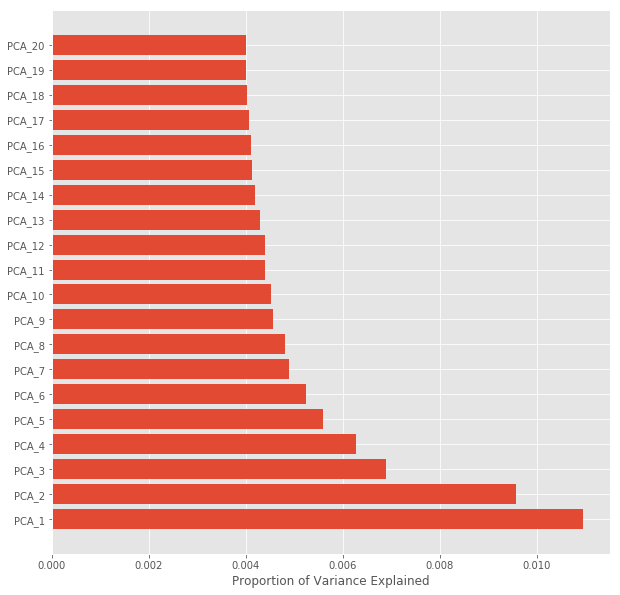

In [89]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.barh(pca_range, pca.explained_variance_ratio_[:n_col_to_display], align='center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')

plt.show()

## Classify main category

### Naive Bayes

In [90]:
# Build a Naive-Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

nbf = MultinomialNB()
nbf.fit(vectors_train,target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [91]:
# Get score for training set
nbf.score(vectors_train,target_train)

0.68202146690518783

In [92]:
# Get score for test set
nbf.score(vectors_test,target_test)

0.65474060822898028

### Random Forest without PCA

In [117]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, min_samples_leaf = 5, n_jobs = -1)
rfc.fit(vectors_train,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [118]:
# Get score for training set
rfc.score(vectors_train,target_train)

0.69141323792486586

In [119]:
# Get score for test set
rfc.score(vectors_test,target_test)

0.60465116279069764

In [174]:
print("the most important vocabs: %s" % (", ".join(vocab[i] for i in rfc.feature_importances_.argsort()[-1:-21:-1])))

the most important vocabs: network, star, quantum, prove, model, data, phase, learning, performance, proposed, mass, field, space, temperature, effect, paper, algorithm, observed, approach, theorem


Feature ranking:
1. network (0.043457)
2. star (0.040168)
3. quantum (0.035587)
4. prove (0.025648)
5. model (0.023444)
6. data (0.022883)
7. phase (0.021246)
8. learning (0.020304)
9. performance (0.016671)
10. proposed (0.015493)


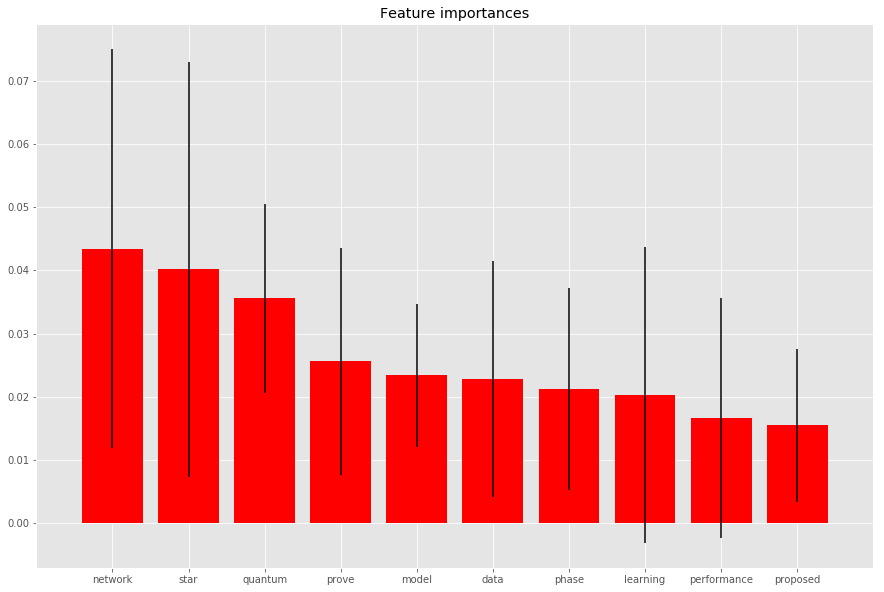

In [187]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = importances.argsort()[-1:-11:-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. %s (%f)" % (f + 1, vocab[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(10), [vocab[s] for s in indices])
plt.xlim([-1, 10])
plt.show()

### Random Forest with PCA

In [157]:
rfc_pca = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 10, n_jobs = -1)
rfc_pca.fit(X_train_pca,target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [158]:
# Get score for training set
rfc_pca.score(X_train_pca,target_train)

0.75313059033989271

In [159]:
# Get score for test set
rfc_pca.score(X_test_pca,target_test)

0.65116279069767447

### Gradient Boosted Tree

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_pca = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=3, max_features = 'auto')
gbt_pca.fit(X_train_pca, target_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [176]:
# Get score for training set
gbt_pca.score(X_train_pca, target_train)

0.020125223613595707

In [188]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=300)
adb.fit(vectors_train,target_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

In [189]:
adb.score(vectors_train,target_train)

0.32558139534883723

# Clustering

In [205]:
import random
from scipy.spatial.distance import euclidean,cosine
from collections import defaultdict
from sklearn import datasets
from sklearn.metrics import silhouette_score
from itertools import combinations


def k_means(X, k=5, max_iter=1000):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    centers = [tuple(pt) for pt in random.sample(list(X), k)]
    for i in range(max_iter):
        clusters = defaultdict(list)

        for datapoint in X:
            distances = [cosine(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)

        new_centers = []
        for center, pts in clusters.items():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))

        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters

def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.items():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals


def plot_k_sse(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')


def turn_clusters_into_labels(clusters):
    """Converts clusters dict returned by k_means into X, y (labels)

    Args:
    - clusters - dict mapping cluster centers to observations
    """
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.items():
        for pt in pts:
            new_X.append(pt)
            labels.append(label)
        label += 1
    return np.array(new_X), np.array(labels)


def plot_k_silhouette(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    silhouette_scores = []
    for k in k_values:
        clusters = k_means(X, k=k)
        new_X, labels = turn_clusters_into_labels(clusters)
        silhouette_scores.append(silhouette_score(new_X, labels))

    plt.plot(k_values, silhouette_scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')


def plot_all_2d(X, feature_names, k=3):
    """Generates all possible 2d plots of observations color coded by cluster ID"""
    pairs = list(combinations(range(X.shape[1]), 2))
    fig, axes = plt.subplots((len(pairs) / 2), 2)
    flattened_axes = [ax for ls in axes for ax in ls]

    for pair, ax in zip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k)


def plot_data_2d(X, plot_labels, ax, k=3):
    """Generates single 2d plot of observations color coded by cluster ID"""
    clusters = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

In [200]:
clustered_X = k_means(X_train_pca, k=5, max_iter=1000)

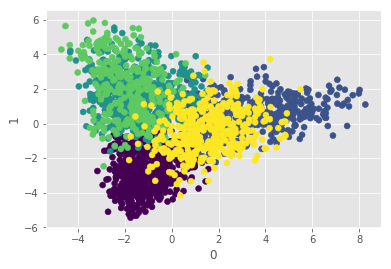

In [206]:
ax = plt.gca()
plot_data_2d(X_train_pca, [0,1],ax, k=5)
plt.show()